# EDA Steps

## 1. Importation des bibliothèques et chargement des données

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import geopandas as gpd

In [43]:
df = pd.read_csv("C:\\Users\\Anaïs\\Downloads\\bicycle_accident\\bicycle_accident\\data\\bicycle_accident.csv", sep=",")

C:\Users\Anaïs\AppData\Local\Temp\ipykernel_7328\2606352.py:1: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:\\Users\\Anaïs\\Downloads\\bicycle_accident\\bicycle_accident\\data\\bicycle_accident.csv", sep=",")


## 2. Observation des données

Afficher le nombre de lignes et de colonnes

In [44]:
df.shape

(74758, 40)

Afficher le nom des variables (colonnes)

In [45]:
df.columns

Index(['Num_Acc', 'date', 'an', 'mois', 'jour', 'hrmn', 'dep', 'com', 'lat',
       'long', 'agg', 'int', 'col', 'lum', 'atm', 'catr', 'circ', 'nbv',
       'prof', 'plan', 'lartpc', 'larrout', 'surf', 'infra', 'situ', 'grav',
       'sexe', 'age', 'trajet', 'secuexist', 'equipement', 'obs', 'obsm',
       'choc', 'manv', 'vehiculeid', 'typevehicules', 'manoeuvehicules',
       'numVehicules', '_infos_commune.code_epci'],
      dtype='object')

Afficher les 5 premières lignes

In [46]:
df.head(5).round(2)

,Num_Acc,date,an,mois,jour,hrmn,dep,com,lat,long,...,equipement,obs,obsm,choc,manv,vehiculeid,typevehicules,manoeuvehicules,numVehicules,_infos_commune.code_epci
0,200500000030,2005-01-13,2005,janvier,jeudi,19:45,62,62331,50.30,2.84,...,0,0.0,2.0,8.0,11.0,200500000030B02,18,17,1.0,200033579.0
1,200500000034,2005-01-19,2005,janvier,mercredi,10:45,62,62022,0.00,0.00,...,0,0.0,2.0,1.0,1.0,200500000034B02,10,15,1.0,200018083.0
2,200500000078,2005-01-26,2005,janvier,mercredi,13:15,02,02173,0.00,0.00,...,2,0.0,2.0,1.0,1.0,200500000078B02,7,15,1.0,200071785.0
3,200500000093,2005-01-03,2005,janvier,lundi,13:30,02,02810,49.26,3.09,...,0,0.0,2.0,3.0,21.0,200500000093B02,7,21,1.0,200071991.0
4,200500000170,2005-01-29,2005,janvier,samedi,18:30,76,76196,0.00,0.00,...,9,0.0,2.0,4.0,2.0,200500000170A01,10,2,1.0,200084952.0


Afficher les 5 dernières lignes

In [47]:
df.tail(5).round(2)

,Num_Acc,date,an,mois,jour,hrmn,dep,com,lat,long,...,equipement,obs,obsm,choc,manv,vehiculeid,typevehicules,manoeuvehicules,numVehicules,_infos_commune.code_epci
74753,202100056317,2021-01-02,2021,janvier,samedi,18:30,44,44168,47.38,-2.20,...,NaN,0.0,0.0,8.0,1.0,202100056317B01,7,14,1.0,244400644.0
74754,202100056362,2021-01-04,2021,janvier,lundi,08:20,64,64138,43.23,-0.28,...,2,0.0,2.0,0.0,1.0,202100056362B01,7,15,1.0,246401756.0
74755,202100056404,2021-01-01,2021,janvier,vendredi,16:55,54,54395,48.68,6.18,...,2,0.0,2.0,1.0,25.0,202100056404A01,7,1,1.0,245400676.0
74756,202100056424,2021-01-02,2021,janvier,samedi,15:40,75,75110,48.88,2.37,...,NaN,0.0,2.0,1.0,1.0,202100056424A01,7,9,1.0,200054781.0
74757,202100056508,2021-01-01,2021,janvier,vendredi,12:20,64,64400,43.15,-0.20,...,2/6,0.0,0.0,8.0,1.0,202100056508A01,NaN,NaN,NaN,246401756.0


Afficher quelques informations générales sur les données

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74758 entries, 0 to 74757
Data columns (total 40 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Num_Acc                   74758 non-null  int64  
 1   date                      74758 non-null  object 
 2   an                        74758 non-null  int64  
 3   mois                      74758 non-null  object 
 4   jour                      74758 non-null  object 
 5   hrmn                      74758 non-null  object 
 6   dep                       74758 non-null  object 
 7   com                       74758 non-null  object 
 8   lat                       74758 non-null  float64
 9   long                      74490 non-null  float64
 10  agg                       74758 non-null  int64  
 11  int                       74758 non-null  int64  
 12  col                       74754 non-null  float64
 13  lum                       74758 non-null  int64  
 14  atm   

In [49]:
df.dtypes

Num_Acc                       int64
date                         object
an                            int64
mois                         object
jour                         object
hrmn                         object
dep                          object
com                          object
lat                         float64
long                        float64
agg                           int64
int                           int64
col                         float64
lum                           int64
atm                         float64
catr                          int64
circ                        float64
nbv                         float64
prof                        float64
plan                        float64
lartpc                      float64
larrout                     float64
surf                        float64
infra                       float64
situ                        float64
grav                          int64
sexe                          int64
age                         

Afficher un résumé statistique des colonnes numériques

<span style="color: green">À faire : analyser chaque variable pour ensuite ne garder que les colonnes pertinentes ici, on devra mettre un exemple de lecture et bien décrire ce que ça signifie</span>

In [50]:
df.describe().round(2)

,Num_Acc,an,lat,long,agg,int,col,lum,atm,catr,...,sexe,age,trajet,secuexist,obs,obsm,choc,manv,numVehicules,_infos_commune.code_epci
count,7.475800e+04,74758.00,74758.00,74490.00,74758.00,74758.00,74754.00,74758.00,74755.00,74758.00,...,74758.00,74732.00,74755.00,74758.00,74732.00,74717.00,74746.00,74742.00,64465.00,7.264800e+04
mean,2.012155e+11,2012.16,19.39,0.88,1.82,2.11,3.50,1.54,1.45,3.80,...,1.24,39.72,3.50,2.14,0.40,1.64,2.82,5.37,1.02,2.164169e+08
std,4.702944e+08,4.70,23.30,6.72,0.38,1.80,1.78,1.27,1.51,1.04,...,0.43,45.54,2.54,0.86,2.11,1.16,2.79,7.03,0.18,2.170030e+07
min,2.005000e+11,2005.00,-23.87,-151.76,1.00,0.00,-1.00,1.00,1.00,1.00,...,-1.00,1.00,-1.00,0.00,-1.00,-1.00,-1.00,-1.00,1.00,2.000002e+08
25%,2.008000e+11,2008.00,0.00,0.00,2.00,1.00,3.00,1.00,1.00,3.00,...,1.00,21.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,2.000548e+08
50%,2.012000e+11,2012.00,0.00,0.00,2.00,1.00,3.00,1.00,1.00,4.00,...,1.00,37.00,5.00,2.00,0.00,2.00,1.00,1.00,1.00,2.000680e+08
75%,2.016000e+11,2016.00,47.20,2.23,2.00,3.00,5.00,1.00,1.00,4.00,...,1.00,55.00,5.00,3.00,0.00,2.00,4.00,11.00,1.00,2.434000e+08
max,2.021001e+11,2021.00,51.07,167.13,2.00,9.00,7.00,5.00,9.00,9.00,...,2.00,2021.00,9.00,3.00,17.00,9.00,9.00,26.00,5.00,2.497401e+08


Afficher un aperçu des valeurs manquantes

In [51]:
df.isnull().sum()

Num_Acc                         0
date                            0
an                              0
mois                            0
jour                            0
hrmn                            0
dep                             0
com                             0
lat                             0
long                          268
agg                             0
int                             0
col                             4
lum                             0
atm                             3
catr                            0
circ                          143
nbv                           197
prof                          177
plan                          200
lartpc                      10972
larrout                      5092
surf                          174
infra                         536
situ                          494
grav                            0
sexe                            0
age                            26
trajet                          3
secuexist     

# 3. Analyse univariée

## **Histogrammes**

### 🔎​ Analyse de la répartition des accidents de vélo **par année**

Interprétation :
- **2005 - 2016** : La fréquence des accidents semble relativement stable avec de légères fluctuations.
- **2017 - 2018** : On observe une forte chute du nombre d’accidents.
- **2018 - 2021** : Après cette chute, la tendance reste à un niveau plus bas et plus stable.

<span style="color: yellow">La baisse après 2017 pourrait être liée à des politiques de sécurité routière, une évolution des infrastructures ou une diminution de l’utilisation du vélo.
Une autre hypothèse pourrait être un événement spécifique (ex. COVID-19 en 2020) qui a temporairement réduit le trafic cycliste (à vérifier).</span>

    Année  Nombre d'accidents
0    2007                5399
1    2005                5282
2    2006                5241
3    2008                5077
4    2009                5060
5    2011                4905
6    2017                4828
7    2014                4719
8    2015                4714
9    2016                4674
10   2010                4588
11   2012                4549
12   2013                4351
13   2021                3052
14   2019                3023
15   2020                2702
16   2018                2594


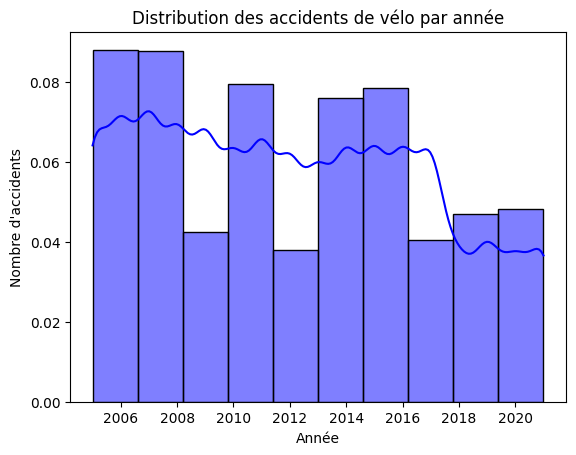

In [ ]:
# Compter le nombre d'accidents (observations) selon l'année
df_counts = df["an"].value_counts().reset_index() 
df_counts.columns = ["Année", "Nombre d'accidents"]
print(df_counts)

sns.histplot(df['an'], bins=10, kde=True, stat="density", color='blue', alpha=0.5)
plt.title("Distribution des accidents de vélo par année")
plt.xlabel("Année")
plt.ylabel("Nombre d'accidents")
plt.show()

# NB : La méthode reset_index() en Pandas permet de réinitialiser l’index d’un DataFrame, en transformant les index existants en colonnes classiques

### 🔎​ Analyse de la répartition des accidents de vélo **par sexe**

Interprétation :
- Les hommes sont beaucoup plus impliqués dans les accidents de vélo que les femmes.
- La différence est très nette : plus du double d’accidents chez les hommes.

<span style="color: yellow">Les hommes sont peut-être plus enclins à prendre des risques, à rouler à des vitesses plus élevées ou à circuler dans des zones plus dangereuses.  
Les hommes peuvent statistiquement utiliser plus fréquemment le vélo que les femmes, ce qui augmente mécaniquement leur exposition aux accidents  
(enquêtes allant dans ce sens : https://fr.statista.com/statistiques/1333206/part-deplacements-locaux-hommes-femmes-pied-velo-selon-genre-france/ ; https://www.insee.fr/fr/statistiques/5400972#graphique-figure4).  
Moins de femmes utilisent peut-être le vélo pour des raisons de sécurité perçue (https://villes-cyclables.org/mediacenter/uploads/dossier-femmesmobilites-5.pdf?version=b87f6c8d). </span>

    Sexe  Nombre d'accidents
0  Homme               56519
1  Femme               18238


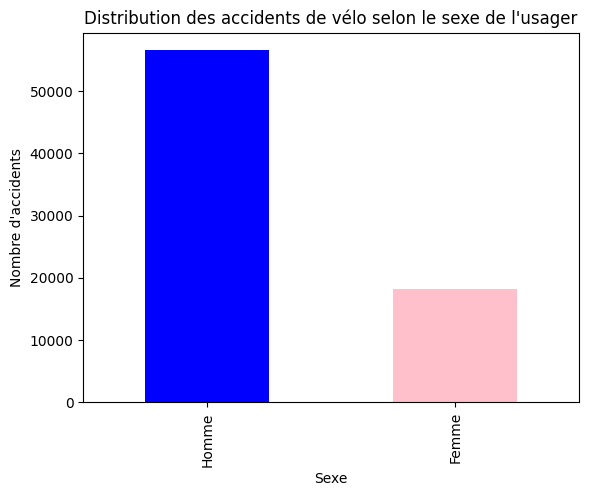

In [104]:
df_filtered = df[df['sexe'].isin([1,2])] # Exclure le sexe égal à -1
df_filtered = df_filtered.copy()  # Créer une copie pour éviter SettingWithCopyWarning
df_filtered['sexe'] = df_filtered['sexe'].replace({1: 'Homme', 2: 'Femme'}) # Remplacer les valeurs numériques par une chaîne de caractères

# Compter le nombre d'accidents (observations) selon le sexe
df_counts = df_filtered["sexe"].value_counts().reset_index() 
df_counts.columns = ["Sexe", "Nombre d'accidents"]
print(df_counts)

df_filtered['sexe'].value_counts().plot(kind='bar', color=['blue', 'pink'])
plt.title("Distribution des accidents de vélo selon le sexe de l'usager")
plt.xlabel("Sexe")
plt.ylabel("Nombre d'accidents")
plt.show()

### 🔎​ Analyse de la répartition des accidents de vélo **par localisation**

Interprétation :
- vrtghtybtybt

<span style="color: yellow">btynynty</span>

         Localisation  Nombre d'accidents
0    En agglomération               61232
1  Hors agglomération               13526


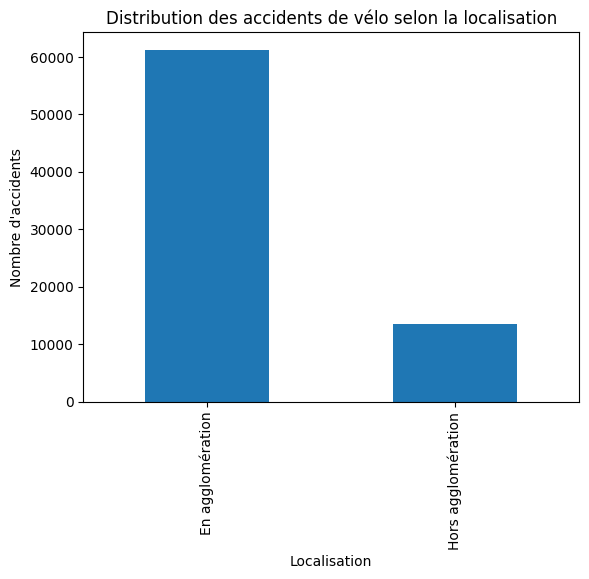

In [ ]:
df_filtered = df.copy() # Créer une copie pour éviter SettingWithCopyWarning 
df_filtered['agg'] = df_filtered['agg'].replace({1: 'Hors agglomération', 2: 'En agglomération'}) # Remplacer les valeurs numériques par une chaîne de caractères

# Compter le nombre d'accidents (observations) selon la localisation
df_counts = df_filtered["agg"].value_counts().reset_index() 
df_counts.columns = ["Localisation", "Nombre d'accidents"]
print(df_counts)

df_filtered['agg'].value_counts().plot(kind='bar')
plt.title("Distribution des accidents de vélo selon la localisation")
plt.xlabel("Localisation")
plt.ylabel("Nombre d'accidents")
plt.show()

### 🔎​ Analyse de la répartition des accidents de vélo **par conditions d'éclairage**

Interprétation :
- vrtghtybtybt

<span style="color: yellow">btynynty</span>

                  Conditions d'éclairage  Nombre d'accidents
0                             Plein jour               61217
1      Nuit avec éclairage public allumé                8106
2                     Crépuscule ou aube                3553
3             Nuit sans éclairage public                1587
4  Nuit avec éclairage public non allumé                 295


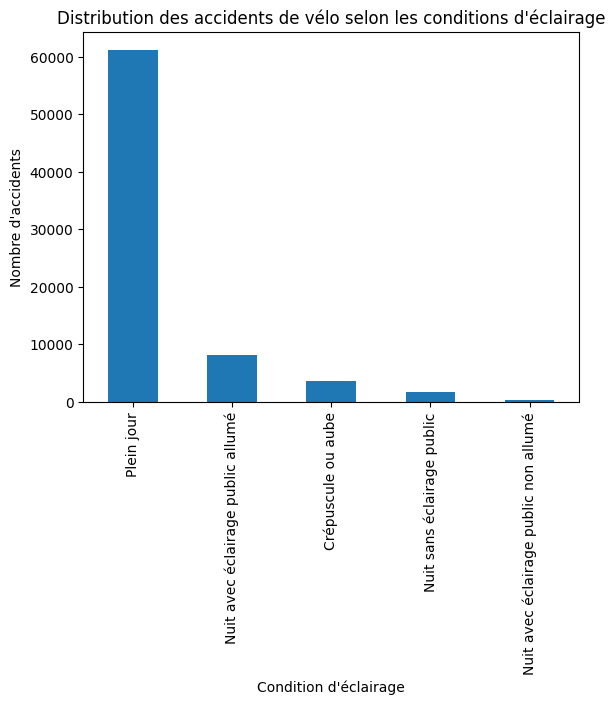

In [ ]:
df_filtered = df.copy() # Créer une copie pour éviter SettingWithCopyWarning 
df_filtered['lum'] = df_filtered['lum'].replace({1: 'Plein jour', 2: 'Crépuscule ou aube', 3: 'Nuit sans éclairage public', 4: 'Nuit avec éclairage public non allumé', 5: 'Nuit avec éclairage public allumé'}) # Remplacer les valeurs numériques par une chaîne de caractères

# Compter le nombre d'accidents (observations) selon les conditions d'éclairage
df_counts = df_filtered["lum"].value_counts().reset_index() 
df_counts.columns = ["Conditions d'éclairage", "Nombre d'accidents"]
print(df_counts)

df_filtered['lum'].value_counts().plot(kind='bar') 
plt.title("Distribution des accidents de vélo selon les conditions d'éclairage")
plt.xlabel("Condition d'éclairage")
plt.ylabel("Nombre d'accidents")
plt.show()

### 🔎​ Analyse de la répartition des accidents de vélo **par catégorie de route**

Interprétation :
- vrtghtybtybt

<span style="color: yellow">btynynty</span>

                                  Catégorie de route  Nombre d'accidents
0                                     Voie communale               48522
1                               Route départementale               21137
2                                    Route nationale                2364
3                                              Autre                1979
4  Parc de stationnement ouvert à la circulation ...                 321
5                        Routes de métropole urbaine                 188
6                                 Hors réseau public                 175
7                                          Autoroute                  72


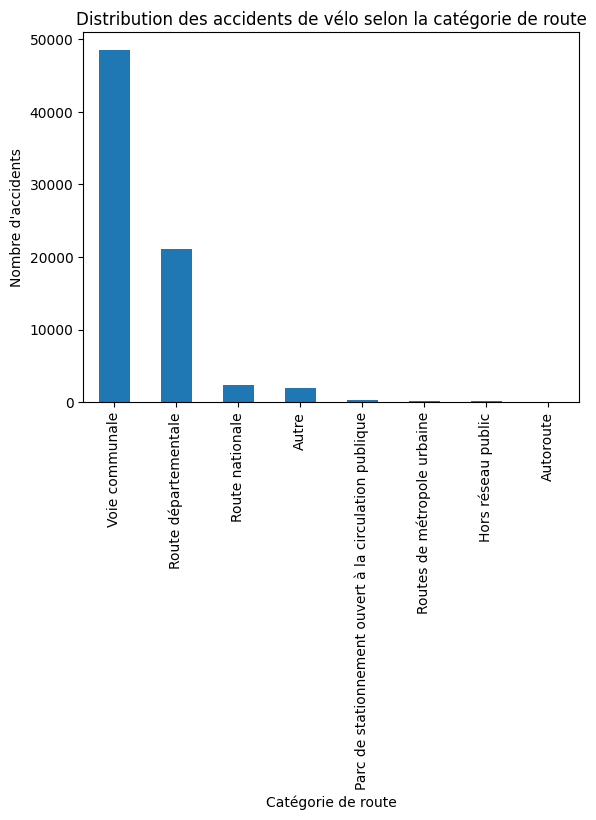

In [ ]:
df_filtered = df.copy() # Créer une copie pour éviter SettingWithCopyWarning 
df_filtered['catr'] = df_filtered['catr'].replace({1: 'Autoroute', 2: 'Route nationale', 3: 'Route départementale', 4: 'Voie communale', 5: 'Hors réseau public', 6:'Parc de stationnement ouvert à la circulation publique', 7:'Routes de métropole urbaine', 9:'Autre'}) # Remplacer les valeurs numériques par une chaîne de caractères

# Compter le nombre d'accidents (observations) selon la catégorie de route
df_counts = df_filtered["catr"].value_counts().reset_index() 
df_counts.columns = ["Catégorie de route", "Nombre d'accidents"]
print(df_counts)

df_filtered['catr'].value_counts().plot(kind='bar') 
plt.title("Distribution des accidents de vélo selon la catégorie de route")
plt.xlabel("Catégorie de route")
plt.ylabel("Nombre d'accidents")
plt.show()

### 🔎​ Analyse de la répartition des accidents de vélo **par état de la surface**

Interprétation :
- vrtghtybtybt

<span style="color: yellow">btynynty</span>

  Etat de la surface  Nombre d'accidents
0            Normale               63856
1           Mouillée                7672
2      Non renseigné                2366
3              Autre                 360
4          Verglacée                 116
5           Enneigée                  76
6   Corps gras-huile                  61
7            Flaques                  51
8               Boue                  18
9           Innondée                   8


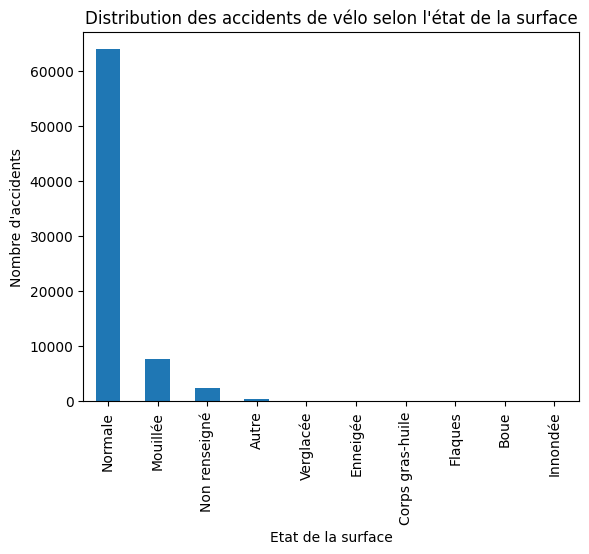

In [ ]:
df_filtered = df.copy() # Créer une copie pour éviter SettingWithCopyWarning 
df_filtered['surf'] = df_filtered['surf'].replace({-1: 'Non renseigné', 1: 'Normale', 2: 'Mouillée', 3: 'Flaques', 4: 'Innondée', 5:'Enneigée', 6:'Boue', 7:'Verglacée', 8:'Corps gras-huile', 9:'Autre'}) # Remplacer les valeurs numériques par une chaîne de caractères

# Compter le nombre d'accidents (observations) selon l'état de la surface
df_counts = df_filtered["surf"].value_counts().reset_index()
df_counts.columns = ["Etat de la surface", "Nombre d'accidents"]
print(df_counts)

df_filtered['surf'].value_counts().plot(kind='bar')
plt.title("Distribution des accidents de vélo selon l'état de la surface")
plt.xlabel("Etat de la surface")
plt.ylabel("Nombre d'accidents")
plt.show()

### 🔎​ Analyse de la répartition des accidents de vélo **par conditions atmosphériques**

Interprétation :
- vrtghtybtybt

<span style="color: yellow">btynynty</span>

  Conditions atmosphériques  Nombre d'accidents
0                   Normale               64792
1              Pluie légère                4832
2             Temps couvert                1998
3         Temps éblouissant                1520
4               Pluie forte                 864
5                     Autre                 260
6          Brouillard-fumée                 199
7         Vent fort-tempête                 167
8               Neige-grêle                 123


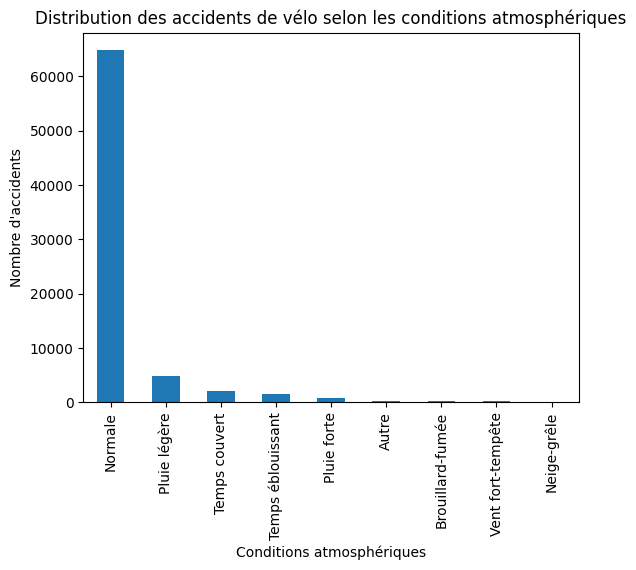

In [111]:
df_filtered = df.copy() # Créer une copie pour éviter SettingWithCopyWarning 
df_filtered['atm'] = df_filtered['atm'].replace({-1: 'Non renseigné', 1: 'Normale', 2: 'Pluie légère', 3: 'Pluie forte', 4: 'Neige-grêle', 5:'Brouillard-fumée', 6:'Vent fort-tempête', 7:'Temps éblouissant', 8:'Temps couvert', 9:'Autre'}) # Remplacer les valeurs numériques par une chaîne de caractères

# Compter le nombre d'accidents (observations) selon les conditions atmosphériques
df_counts = df_filtered["atm"].value_counts().reset_index()
df_counts.columns = ["Conditions atmosphériques", "Nombre d'accidents"]
print(df_counts)

df_filtered['atm'].value_counts().plot(kind='bar')
plt.title("Distribution des accidents de vélo selon les conditions atmosphériques")
plt.xlabel("Conditions atmosphériques")
plt.ylabel("Nombre d'accidents")
plt.show()

### 🔎​ Analyse de la répartition des accidents de vélo **par mois**

Interprétation :
- vrtghtybtybt

<span style="color: yellow">btynynty</span>

         Mois  Nombre d'accidents
0        juin                8437
1   septembre                8124
2     juillet                7841
3     octobre                7256
4         mai                7213
5        août                6657
6       avril                6187
7        mars                5304
8    novembre                5285
9     janvier                4350
10   décembre                4182
11    février                3922


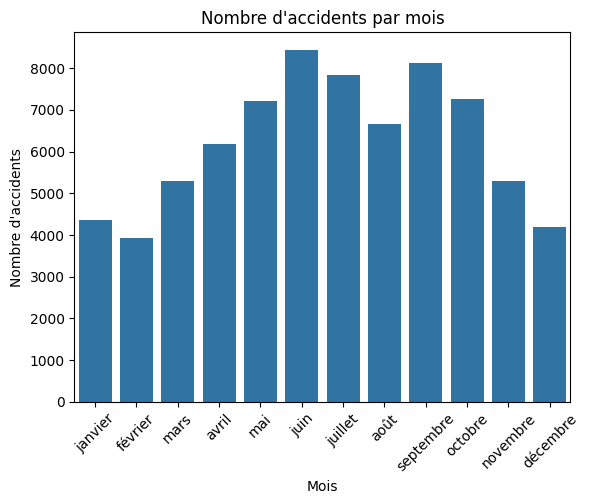

In [ ]:
# Compter le nombre d'accidents (observations) pour chaque mois
df_counts = df_filtered["mois"].value_counts().reset_index() # Afficher le nombre d'accidents par catégorie de route
df_counts.columns = ["Mois", "Nombre d'accidents"]
print(df_counts)

sns.countplot(x='mois', data=df, order=['janvier', 'février', 'mars', 'avril', 'mai', 'juin', 'juillet', 'août', 'septembre', 'octobre', 'novembre', 'décembre'])

plt.title("Nombre d'accidents par mois")
plt.xlabel("Mois")
plt.ylabel("Nombre d'accidents")
plt.xticks(rotation=45)
plt.show()

### 🔎​ Analyse de la répartition des accidents de vélo **par tranche d'âge**

Interprétation :
- vrtghtybtybt

<span style="color: yellow">btynynty</span>

  Tranche d'âge  Nombre d'accidents
0         19-30               16086
1           61+               14124
2          0-18               13652
3         31-40               10383
4         51-60               10250
5         41-50               10200


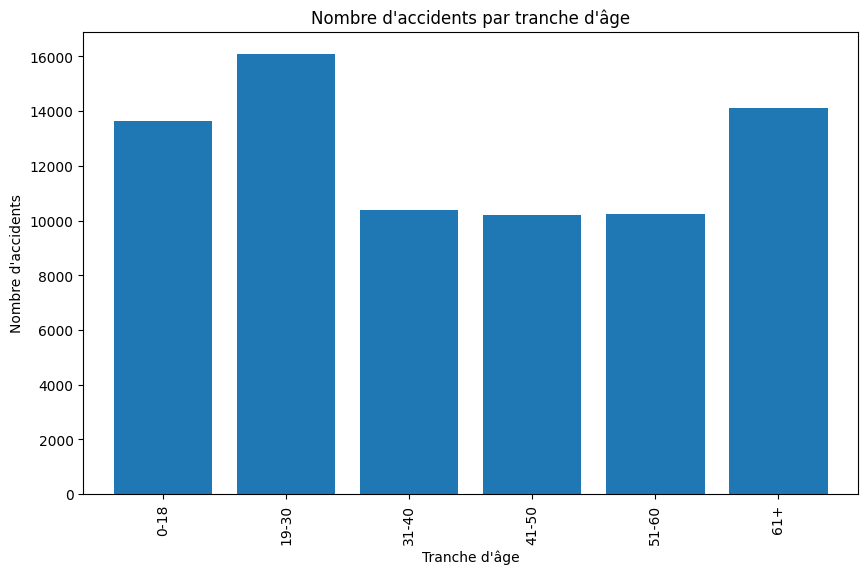

In [ ]:
# Définir les tranches d'âge
bins = [0, 18, 30, 40, 50, 60, 100]  # Définir les intervalles d'âge
labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '61+']  # Labels des tranches

# Créer une colonne "tranche_age" dans le DataFrame
df['tranche_age'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Compter le nombre d'accidents (observations) pour chaque tranche d'âge
accidents_par_age = df['tranche_age'].value_counts().sort_index()

df_counts = df["tranche_age"].value_counts().reset_index()
df_counts.columns = ["Tranche d'âge", "Nombre d'accidents"]
print(df_counts)

plt.figure(figsize=(10, 6))
accidents_par_age.plot(kind='bar', width=0.8)
plt.title("Nombre d'accidents par tranche d'âge")
plt.xlabel("Tranche d'âge")
plt.ylabel("Nombre d'accidents")
plt.show()

### 🔎​ Analyse de la répartition des accidents de vélo **par gravité**

Interprétation :
- vrtghtybtybt

<span style="color: yellow">btynynty</span>

              Gravité  Nombre d'accidents
0        Blessé léger               42824
1  Blessé hospitalisé               24260
2             Indemne                4914
3                 Tué                2760


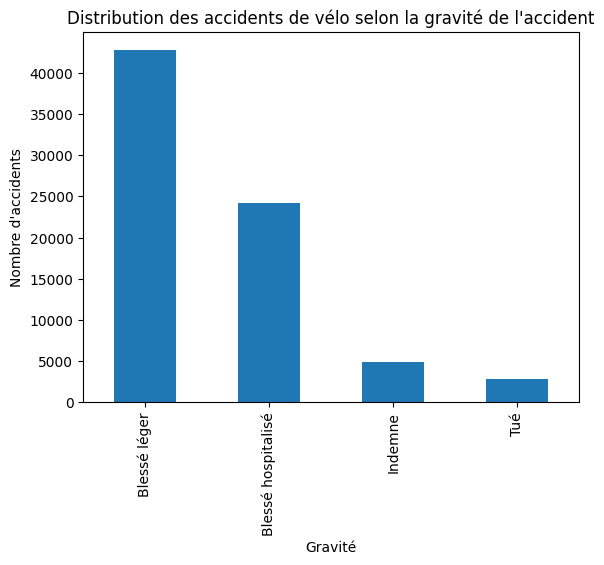

In [106]:
df_filtered = df.copy() # Créer une copie pour éviter SettingWithCopyWarning 
df_filtered['grav'] = df_filtered['grav'].replace({1: 'Indemne', 2: 'Tué', 3: 'Blessé hospitalisé', 4: 'Blessé léger'}) # Remplacer les valeurs numériques par une chaîne de caractères

# Compter le nombre d'accidents (observations) par gravité
df_counts = df_filtered["grav"].value_counts().reset_index()
df_counts.columns = ["Gravité", "Nombre d'accidents"]
print(df_counts)

df_filtered['grav'].value_counts().plot(kind='bar')
plt.title("Distribution des accidents de vélo selon la gravité de l'accident")
plt.xlabel("Gravité")
plt.ylabel("Nombre d'accidents")
plt.show()

### 🔎​ Analyse de la répartition des accidents de vélo **par motif de déplacement**

Interprétation :
- vrtghtybtybt

<span style="color: yellow">btynynty à noter : -1 et 0 représentent "non renseigné" , à regrouper pour des analyses futures ?</span>

          Motif de déplacement  Nombre d'accidents
0            Promenade-loisirs               37953
1                Non renseigné               14692
2             Domicile-travail               10926
3                        Autre                4689
4               Domicile-école                2905
5  Utilisation professionnelle                2206
6               Courses-achats                1384


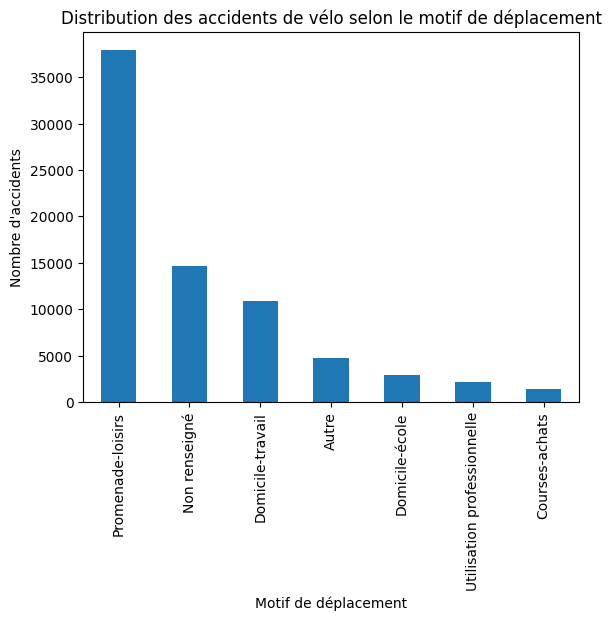

In [153]:
df_filtered = df.copy() # Créer une copie pour éviter SettingWithCopyWarning 
df_filtered['trajet'] = df_filtered['trajet'].replace({-1:'Non renseigné', 0 : 'Non renseigné', 1: 'Domicile-travail', 2: 'Domicile-école', 3: 'Courses-achats', 4: 'Utilisation professionnelle', 5:'Promenade-loisirs', 9:'Autre'}) # Remplacer les valeurs numériques par une chaîne de caractères

# Compter le nombre d'accidents (observations) par gravité
df_counts = df_filtered["trajet"].value_counts().reset_index()
df_counts.columns = ["Motif de déplacement", "Nombre d'accidents"]
print(df_counts)

df_filtered['trajet'].value_counts().plot(kind='bar')
plt.title("Distribution des accidents de vélo selon le motif de déplacement")
plt.xlabel("Motif de déplacement")
plt.ylabel("Nombre d'accidents")
plt.show()

### 🔎​ Analyse de la répartition des accidents de vélo selon **l'heure de survenue** 

Interprétation :
- vrtghtybtybt

<span style="color: yellow">btynynty ici il faudra pê séparer les heures et minutes en deux colonnes distinctes, je pense que l'on prendra juste l'heure pour faire nos sommes d'accidents (histoire d'avoir un ordre d'idée).
j'imagine qu'on devrait retrouver davantage d'accidents le matin et le soir (moment où les gens doivent aller travailler/à l'école) => à confirmer donc

à mettre en relation avec lum également ?</span>

a faire : analyse relation entre obs et nombre d'accidents ainsi que obsm et nombre d'accidents (ce sont les obstacles heurtés) => cela permettra de voir les dangers et si des mesures à prendre pourrait être bénéfique pour améliorer la sécurité

## **Cartes statistiques**

### Analyse de la répartition des accidents de vélo **par emplacement**

Interprétation :
- vrtghtybtybt

<span style="color: yellow">btynynty</span>

In [ ]:
m = folium.Map(location=[46.603354, 1.888334], zoom_start=6) 

df_cleaned = df.dropna(subset=['lat', 'long'])

# Ajouter des marqueurs pour chaque département
for _, row in df_cleaned.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['long']],
        radius=10,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6,
        popup=f"Département {row['dep']}"
    ).add_to(m)

# Afficher la carte
m.save("carte_accidents.html")

     Département  Nombre d'accidents
36         Paris               12774
34         Rhône                2631
54       Gironde                2449
15      Bas-Rhin                2278
85          Nord                2220
..           ...                 ...
24        Ariège                  95
48  Corse-du-Sud                  86
81           Lot                  83
30        Lozère                  54
50        Creuse                  38

[96 rows x 2 columns]


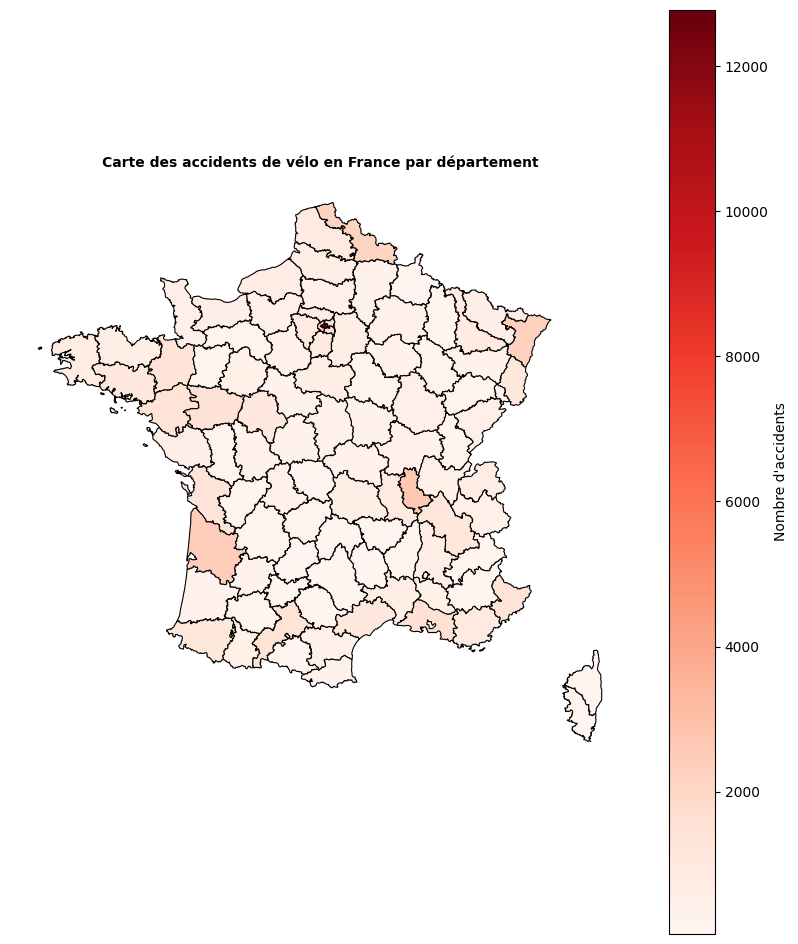

In [148]:
# Charger le fichier GeoJSON des départements français
gdf = gpd.read_file("C:\\Users\\Anaïs\\Downloads\\bicycle_accident\\bicycle_accident\\data\\departements.geojson")  # Remplace par le chemin réel si nécessaire

# Compter les accidents par département
accidents_by_dep = df['dep'].value_counts().reset_index()
accidents_by_dep.columns = ['code', 'Nombre_Accidents']
accidents_by_dep['code'] = accidents_by_dep['code'].astype(str)

# Fusionner avec la carte des départements
gdf = gdf.merge(accidents_by_dep, left_on='code', right_on='code', how='left')
gdf['Nombre_Accidents'] = gdf['Nombre_Accidents'].fillna(0)  # Remplace NaN par 0

# Renommer les colonnes du DataFrame précédent et afficher le nombre d'accidents par département
gdf = gdf.rename(columns={'nom': 'Département'})
gdf = gdf.rename(columns={'Nombre_Accidents': 'Nombre d\'accidents'})
mycolumns = ['Département','Nombre d\'accidents'] 
tri = gdf[mycolumns]

# Trier par ordre croissant
tri1 = tri.copy()
print(tri1.sort_values('Nombre d\'accidents', ascending=False))

# Tracer la carte avec un dégradé de couleurs
fig, ax = plt.subplots(1, 1, figsize=(10, 12))
gdf.plot(column='Nombre d\'accidents', cmap='Reds', linewidth=0.8, edgecolor='black',
         legend=True, legend_kwds={'label': "Nombre d'accidents", 'orientation': "vertical"}, ax=ax)

ax.set_title("Carte des accidents de vélo en France par département", fontsize=10, fontweight='bold')
ax.axis('off')  # Désactiver les axes

# Afficher la carte
plt.show()

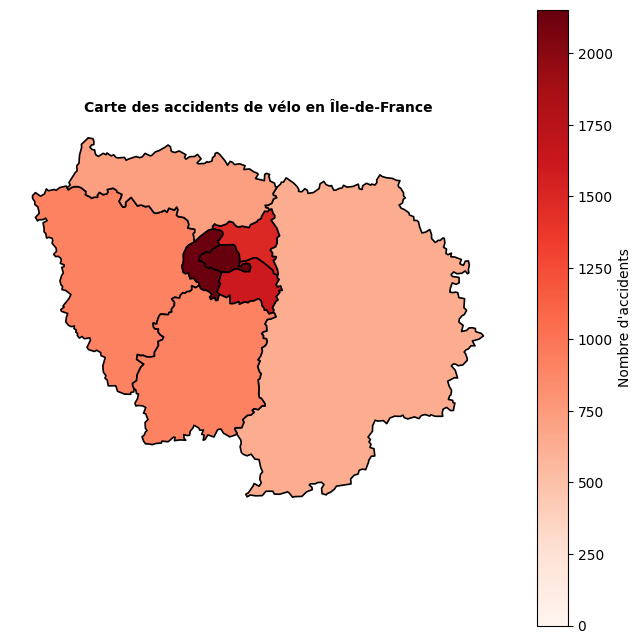

In [135]:
# Liste des codes des départements d'Île-de-France
dep_ile_de_france = ["75", "77", "78", "91", "92", "93", "94", "95"]
gdf_idf = gdf[gdf['code'].isin(dep_ile_de_france)]

# Tracer la carte zoomée sur l'Île-de-France
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
gdf_idf.plot(column='Nombre_Accidents', cmap='Reds', linewidth=1.2, edgecolor='black',
             legend=True, legend_kwds={'label': "Nombre d'accidents", 'orientation': "vertical"}, ax=ax,
             vmin=0, vmax=gdf['Nombre_Accidents'].quantile(0.95))  # Ajustement des couleurs

ax.set_title("Carte des accidents de vélo en Île-de-France", fontsize=10, fontweight='bold')
ax.axis('off')  # Désactiver les axes

# Afficher la carte
plt.show()

                        Région  Nombre d'accidents
0                Île-de-France               21183
15        Auvergne-Rhône-Alpes                8095
8           Nouvelle-Aquitaine                6890
5                    Grand Est                6058
14                   Occitanie                5085
16  Provence-Alpes-Côte d'Azur                4587
4              Hauts-de-France                4365
6             Pays de la Loire                4138
7                     Bretagne                3845
1          Centre-Val de Loire                2783
3                    Normandie                2381
2      Bourgogne-Franche-Comté                2365
12                  La Réunion                 988
11                      Guyane                 805
9                   Guadeloupe                 431
10                  Martinique                 279
17                       Corse                 202
13                     Mayotte                  48


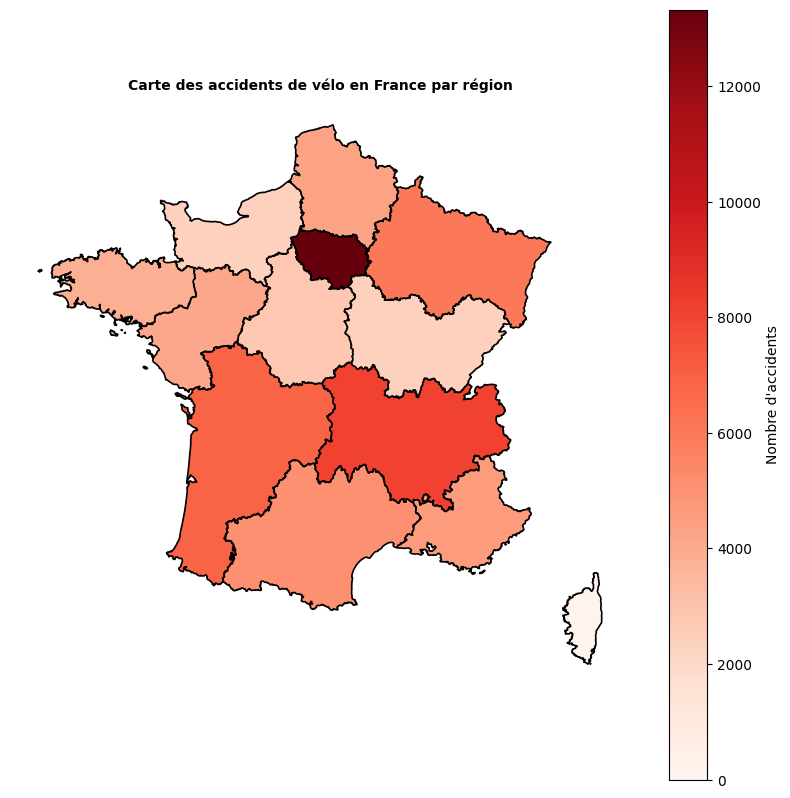

In [149]:
# Charger le fichier GeoJSON des régions françaises
gdf = gpd.read_file("C:\\Users\\Anaïs\\Downloads\\bicycle_accident\\bicycle_accident\\data\\regions.geojson")  # Remplace par le chemin réel si nécessaire
gdf['code'] = gdf['code'].astype(int)

# Charger les correspondances départements-régions
file_departement_region = "C:\\Users\\Anaïs\\Downloads\\bicycle_accident\\bicycle_accident\\data\\v_departement_2025.csv"  # Fichier associant départements et régions
df_dep_reg = pd.read_csv(file_departement_region)

# Associer chaque accident à sa région
df_accidents = df.merge(df_dep_reg, left_on='dep', right_on='DEP', how='left')

# Compter les accidents par région
accidents_by_region = df_accidents['REG'].value_counts().reset_index()
accidents_by_region.columns = ['code', 'Nombre_Accidents']
accidents_by_region['code'] = accidents_by_region['code'].astype(int)

# Fusionner avec la carte des régions
gdf = gdf.merge(accidents_by_region, left_on='code', right_on='code', how='left')
gdf['Nombre_Accidents'] = gdf['Nombre_Accidents'].fillna(0)  # Remplace NaN par 0

# Renommer les colonnes du DataFrame précédent et afficher le nombre d'accidents par région
gdf = gdf.rename(columns={'nom': 'Région'})
gdf = gdf.rename(columns={'Nombre_Accidents': 'Nombre d\'accidents'})
mycolumns = ['Région','Nombre d\'accidents'] 
tri = gdf[mycolumns]

# Trier par ordre croissant
tri1 = tri.copy()
print(tri1.sort_values('Nombre d\'accidents', ascending=False))

# Exclure les DOM-TOM (codes régions: 01, 02, 03, 04, 06)
dom_codes = [1, 2, 3, 4, 6]
gdf = gdf[~gdf['code'].isin(dom_codes)]

# Tracer la carte avec un dégradé de couleurs
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf.plot(column='Nombre d\'accidents', cmap='Reds', linewidth=1.2, edgecolor='black',
         legend=True, legend_kwds={'label': "Nombre d'accidents", 'orientation': "vertical"}, ax=ax,
         vmin=0, vmax=gdf['Nombre d\'accidents'].quantile(0.95))  # Ajustement des couleurs

ax.set_title("Carte des accidents de vélo en France par région", fontsize=10, fontweight='bold')
ax.axis('off')  # Désactiver les axes

# Afficher la carte
plt.show()  

# 4. Analyse bivariée

### Relation entre l'**équipement de sécurité** et la **gravité** de l'accident

Interprétation :
- vrtghtybtybt

<span style="color: yellow">btynynty Il faudra certainement remplacer ces deux variables en :  
- une variable binaire pour les équipements (0 pour non renseigné ou aucun équipement et 1 pour le reste)  
- une variable qui prend en compte le niveau de gravité (peut-être 1 pour indemne, 2 blessé léger, 3 blessé hospitalisé et 4 tué), dans l'ordre du niveau de gravité  
ça nous permettra de faire une heatmap cohérente et sûrement une régression linéaire</span>

grav                Blessé hospitalisé  Blessé léger  Indemne   Tué
secuexist                                                          
Aucun équipement                    99            32        8    14
Casque                            6334          9790      887   901
Ceinture                          8849         11727     1474  1036
Dispositif enfants                8978         21275     2545   809


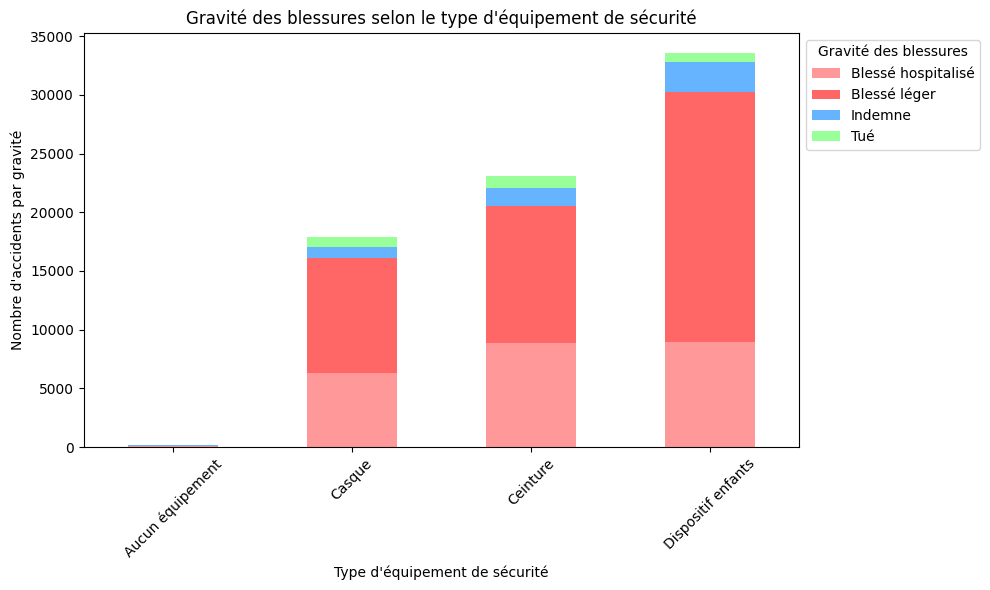

In [178]:
df_grav_equip = df.copy() # Créer une copie pour éviter SettingWithCopyWarning 
df_grav_equip['grav'] = df_grav_equip['grav'].replace({1: 'Indemne', 2: 'Tué', 3: 'Blessé hospitalisé', 4: 'Blessé léger'}) # Remplacer les valeurs numériques par une chaîne de caractères
df_grav_equip['secuexist'] = df_grav_equip['secuexist'].replace({-1:'Non renseigné', 0:'Aucun équipement', 1: 'Ceinture', 2: 'Casque', 3: 'Dispositif enfants', 4: 'Gilet réfléchissant', 5:'Airbag (2RM/3RM)', 6:'Gants (RRM/3RM)', 7:'Gants+Airbag (2RM/3RM)', 8:'Non déterminable', 9:'Autre'}) # Remplacer les valeurs numériques par une chaîne de caractères

pivot = pd.crosstab(df_grav_equip['secuexist'], df_grav_equip['grav'])
print(pivot)

# Création du diagramme empilé
pivot.plot(kind='bar', stacked=True, figsize=(10, 6),
           color=['#FF9999', '#FF6666', '#66B3FF', '#99FF99'])

plt.title("Gravité des blessures selon le type d'équipement de sécurité")
plt.xlabel("Type d'équipement de sécurité")
plt.ylabel("Nombre d'accidents par gravité")
plt.xticks(rotation=45)
plt.legend(title="Gravité des blessures", bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Relation entre le **sexe** et la **gravité** de l'accident

Interprétation :
- vrtghtybtybt

<span style="color: yellow">nyugrthht</span>

grav   Blessé hospitalisé  Blessé léger  Indemne   Tué
sexe                                                  
Femme                4929         12174      697   438
Homme               19331         30650     4216  2322


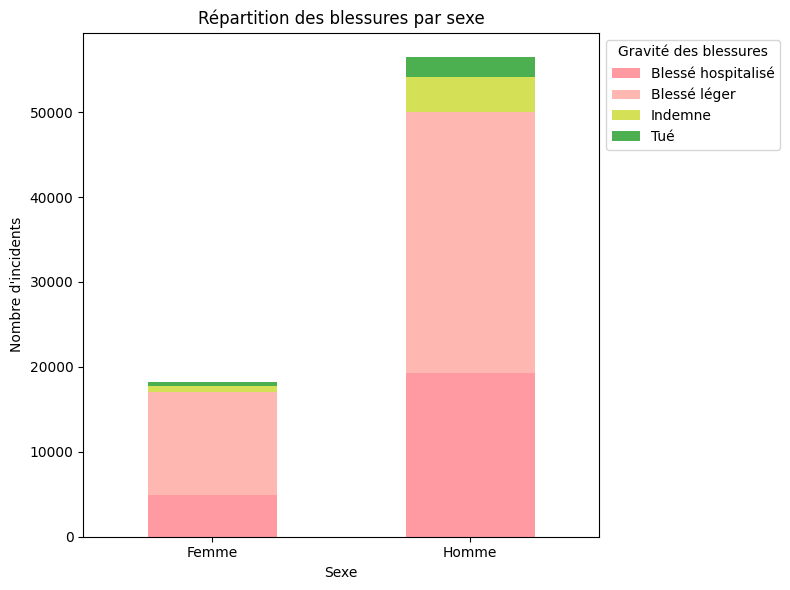

Pourcentage de gravité parmi les hommes et parmi les femmes
grav   sexe  Blessé hospitalisé  Blessé léger  Indemne  Tué
0     Femme                27.0          66.8      3.8  2.4
1     Homme                34.2          54.2      7.5  4.1
Lecture: il y a 34.2% de blessés hospitalisés parmi les hommes


In [ ]:
df_grav_sexe = df[df['sexe'].isin([1,2])] # Exclure le sexe égal à -1
df_grav_sexe = df_grav_sexe.copy() # Créer une copie pour éviter SettingWithCopyWarning 
df_grav_sexe['grav'] = df_grav_sexe['grav'].replace({1: 'Indemne', 2: 'Tué', 3: 'Blessé hospitalisé', 4: 'Blessé léger'}) # Remplacer les valeurs numériques par une chaîne de caractères
df_grav_sexe['sexe'] = df_grav_sexe['sexe'].replace({1:'Homme', 2:'Femme'}) # Remplacer les valeurs numériques par une chaîne de caractères

# Créer un tableau croisé pour compter les occurrences
pivot = pd.crosstab(df_grav_sexe['sexe'], df_grav_sexe['grav'])

print(pivot)

# Palette de couleurs sympa
colors = ['#FF9AA2', '#FFB7B2', '#D4E157', '#4CAF50']

# Création du diagramme empilé
pivot.plot(kind='bar', stacked=True, figsize=(8, 6), color=colors)

# Ajouter des titres et labels
plt.title("Répartition des blessures par sexe")
plt.xlabel("Sexe")
plt.ylabel("Nombre d'accidents")
plt.xticks(rotation=0)
plt.legend(title="Gravité des blessures", bbox_to_anchor=(1, 1), loc='upper left')

# Affichage du graphique
plt.tight_layout()
plt.show()


print("Pourcentage de gravité parmi les hommes et parmi les femmes")

# Recrée un DataFrame qui garde la colonne sexe
pivot.reset_index(inplace=True)  # Récupérer les index en colonnes
df_percent = pivot.set_index('sexe')  # Mettre sexe en index
df_percent = df_percent.div(df_percent.sum(axis=1), axis=0) * 100  # Convertir en %

# Réintégrer l’index dans le tableau
df_percent.reset_index(inplace=True)

# Arrondir les pourcentages pour plus de lisibilité
df_percent = df_percent.round(1)

# Affichage du tableau final
print(df_percent)

print("Lecture: il y a 34.2% de blessés hospitalisés parmi les hommes")


#NB : df_percent.sum(axis=1) calcule la somme des valeurs sur chaque ligne (axis=1 signifie "somme sur les colonnes").
#.div(..., axis=0) signifie diviser chaque valeur par le total de sa ligne.


grav   Blessé hospitalisé  Blessé léger  Indemne   Tué
sexe                                                  
Femme                4929         12174      697   438
Homme               19331         30650     4216  2322


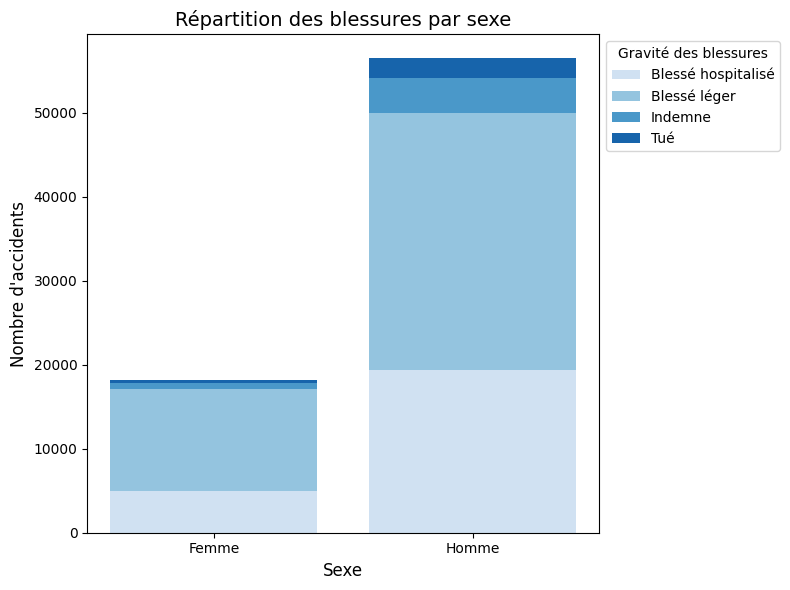


📊 Pourcentage de gravité des blessures par sexe:
grav   Blessé hospitalisé  Blessé léger  Indemne  Tué
sexe                                                 
Femme                27.0          66.8      3.8  2.4
Homme                34.2          54.2      7.5  4.1

Lecture: il y a 34.2% de blessés hospitalisés parmi les hommes.


In [216]:
#c la meme chose que au dessus mais un peu mieux présenté, le code est un peu plus compliqué, à voir celui qu'on garde

# Filtrer les données et renommer les valeurs
df_grav_sexe = df[df['sexe'].isin([1, 2])].copy()
df_grav_sexe['grav'] = df_grav_sexe['grav'].replace({1: 'Indemne', 2: 'Tué', 3: 'Blessé hospitalisé', 4: 'Blessé léger'})
df_grav_sexe['sexe'] = df_grav_sexe['sexe'].replace({1: 'Homme', 2: 'Femme'})

# Créer un tableau croisé des blessures par sexe
pivot = pd.crosstab(df_grav_sexe['sexe'], df_grav_sexe['grav'])

print(pivot)

# Définir une palette de couleurs dégradée (ici, du bleu)
n_categories = len(pivot.columns)  # Le nombre de catégories de blessures
colors = sns.color_palette("Blues", n_colors=n_categories)  # Palette de bleu

# Création du diagramme empilé avec les couleurs
fig, ax = plt.subplots(figsize=(8, 6))
bottom = [0, 0]  # Position initiale pour empiler les barres

for i, category in enumerate(pivot.columns):  # Parcours des catégories de gravité
    ax.bar(pivot.index, pivot[category], bottom=bottom, 
           color=colors[i], label=category)
    bottom += pivot[category]  # Mise à jour de la position pour empiler

# Ajouter des titres et labels
plt.title("Répartition des blessures par sexe", fontsize=14)
plt.xlabel("Sexe", fontsize=12)
plt.ylabel("Nombre d'accidents", fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="Gravité des blessures", bbox_to_anchor=(1, 1), loc='upper left')

# Affichage du graphique
plt.tight_layout()
plt.show()

# Affichage du pourcentage de gravité par sexe
pivot_percent = pivot.div(pivot.sum(axis=1), axis=0) * 100  # Convertir en %
pivot_percent = pivot_percent.round(1)  # Arrondir pour la lisibilité

print("\n📊 Pourcentage de gravité des blessures par sexe:")
print(pivot_percent)

print("\nLecture: il y a 34.2% de blessés hospitalisés parmi les hommes.")

### Relation entre l'**heure** de l'accident et la **gravité** des blessures

Interprétation :
- vrtghtybtybt

<span style="color: yellow">nyugrthht</span>

## **Heatmap**

attention, il faudra bien convertir le type de nos variables et que l'on prenne des choses cohérentes

# 5. Analyse multivariée

# 6. Nettoyage

In [ ]:
df_cleaned = df.dropna(subset=['lat', 'long']) 

In [ ]:
df['mois'] = pd.to_datetime(df['mois']) 
   

C:\Users\Anaïs\AppData\Local\Temp\ipykernel_23276\2730637495.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['mois'] = pd.to_datetime(df['mois'])


DateParseError: Unknown datetime string format, unable to parse: janvier, at position 0

# 7. Feature engineering